In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities
cities = []
# Identify the nearest ity for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

638

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a51a985e5791fedf0cfe595b0ac56f4


In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vinh
Processing Record 2 of Set 1 | ribeira grande
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | pevek
Processing Record 5 of Set 1 | karla
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | hasaki
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | porto novo
Processing Record 11 of Set 1 | norman wells
Processing Record 12 of Set 1 | columbus
Processing Record 13 of Set 1 | bengkulu
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | santarem
Processing Record 17 of Set 1 | puqi
Processing Record 18 of Set 1 | nicoya
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | januaria
Processing Record 21 of Set 1 | kushnarenkovo
Processing Record 22 of Set 1 | shar
Processing Recor

Processing Record 36 of Set 4 | kruisfontein
Processing Record 37 of Set 4 | shimoda
Processing Record 38 of Set 4 | samusu
City not found. Skipping...
Processing Record 39 of Set 4 | lebu
Processing Record 40 of Set 4 | puerto ayora
Processing Record 41 of Set 4 | airai
Processing Record 42 of Set 4 | walvis bay
Processing Record 43 of Set 4 | jamestown
Processing Record 44 of Set 4 | elbistan
Processing Record 45 of Set 4 | cidreira
Processing Record 46 of Set 4 | flinders
Processing Record 47 of Set 4 | coronel vivida
Processing Record 48 of Set 4 | mangrol
Processing Record 49 of Set 4 | flin flon
Processing Record 50 of Set 4 | statesboro
Processing Record 1 of Set 5 | yanam
Processing Record 2 of Set 5 | bredasdorp
Processing Record 3 of Set 5 | svetlaya
Processing Record 4 of Set 5 | hendijan
City not found. Skipping...
Processing Record 5 of Set 5 | miramar
Processing Record 6 of Set 5 | constitucion
Processing Record 7 of Set 5 | upernavik
Processing Record 8 of Set 5 | bataga

Processing Record 26 of Set 8 | kotka
Processing Record 27 of Set 8 | voisiku
City not found. Skipping...
Processing Record 28 of Set 8 | letterkenny
Processing Record 29 of Set 8 | mancora
Processing Record 30 of Set 8 | sumbe
Processing Record 31 of Set 8 | kirakira
Processing Record 32 of Set 8 | chulym
Processing Record 33 of Set 8 | haifa
Processing Record 34 of Set 8 | golfito
Processing Record 35 of Set 8 | tateyama
Processing Record 36 of Set 8 | herat
Processing Record 37 of Set 8 | nombre de dios
Processing Record 38 of Set 8 | puerto el triunfo
Processing Record 39 of Set 8 | hualmay
Processing Record 40 of Set 8 | fria
Processing Record 41 of Set 8 | oga
Processing Record 42 of Set 8 | kalaleh
Processing Record 43 of Set 8 | andarab
City not found. Skipping...
Processing Record 44 of Set 8 | touros
Processing Record 45 of Set 8 | kaniama
Processing Record 46 of Set 8 | kyshtovka
Processing Record 47 of Set 8 | margate
Processing Record 48 of Set 8 | jardim do serido
Process

Processing Record 10 of Set 12 | ambilobe
Processing Record 11 of Set 12 | honningsvag
Processing Record 12 of Set 12 | severo-yeniseyskiy
Processing Record 13 of Set 12 | mount isa
Processing Record 14 of Set 12 | san quintin
Processing Record 15 of Set 12 | cabras
Processing Record 16 of Set 12 | mnogovershinnyy
Processing Record 17 of Set 12 | obo
Processing Record 18 of Set 12 | karasburg
Processing Record 19 of Set 12 | sola
Processing Record 20 of Set 12 | conceicao da barra
Processing Record 21 of Set 12 | asau
Processing Record 22 of Set 12 | monte carmelo
Processing Record 23 of Set 12 | kiruna
Processing Record 24 of Set 12 | niles
Processing Record 25 of Set 12 | cervia
Processing Record 26 of Set 12 | beringovskiy
Processing Record 27 of Set 12 | le port
Processing Record 28 of Set 12 | tubruq
City not found. Skipping...
Processing Record 29 of Set 12 | vanimo
Processing Record 30 of Set 12 | davila
Processing Record 31 of Set 12 | nhulunbuy
Processing Record 32 of Set 12 |

In [9]:
# Checking to make sure there are at least 500 cities
len(city_data)

579

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vinh,18.6667,105.6667,69.71,90,12,1.57,VN,2022-01-27 17:05:38
1,Ribeira Grande,38.5167,-28.7000,61.20,67,40,9.22,PT,2022-01-27 17:00:56
2,Pevek,69.7008,170.3133,-27.83,100,28,3.02,RU,2022-01-27 17:05:38
3,Karla,59.3723,24.9275,33.76,85,100,8.05,EE,2022-01-27 17:05:39
4,Hermanus,-34.4187,19.2345,70.90,77,3,9.44,ZA,2022-01-27 17:05:39
5,Hasaki,35.7333,140.8333,39.60,59,100,12.01,JP,2022-01-27 17:05:39
6,Mataura,-46.1927,168.8643,40.48,94,98,2.13,NZ,2022-01-27 17:04:10
7,Ushuaia,-54.8000,-68.3000,49.62,83,100,2.89,AR,2022-01-27 17:05:40
8,Porto Novo,6.4965,2.6036,84.54,56,88,9.75,BJ,2022-01-27 17:01:52
9,Norman Wells,65.2820,-126.8329,-5.21,99,100,1.66,CA,2022-01-27 17:05:40


In [11]:
# Reorder the columns for easier interpretation
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vinh,VN,2022-01-27 17:05:38,18.6667,105.6667,69.71,90,12,1.57
1,Ribeira Grande,PT,2022-01-27 17:00:56,38.5167,-28.7000,61.20,67,40,9.22
2,Pevek,RU,2022-01-27 17:05:38,69.7008,170.3133,-27.83,100,28,3.02
3,Karla,EE,2022-01-27 17:05:39,59.3723,24.9275,33.76,85,100,8.05
4,Hermanus,ZA,2022-01-27 17:05:39,-34.4187,19.2345,70.90,77,3,9.44
5,Hasaki,JP,2022-01-27 17:05:39,35.7333,140.8333,39.60,59,100,12.01
6,Mataura,NZ,2022-01-27 17:04:10,-46.1927,168.8643,40.48,94,98,2.13
7,Ushuaia,AR,2022-01-27 17:05:40,-54.8000,-68.3000,49.62,83,100,2.89
8,Porto Novo,BJ,2022-01-27 17:01:52,6.4965,2.6036,84.54,56,88,9.75
9,Norman Wells,CA,2022-01-27 17:05:40,65.2820,-126.8329,-5.21,99,100,1.66


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


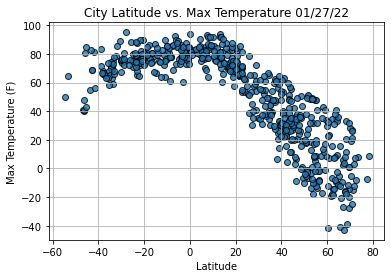

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

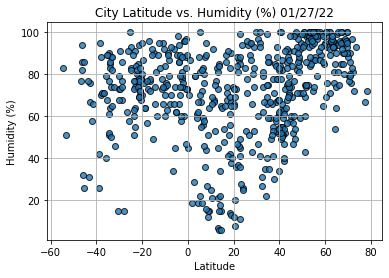

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

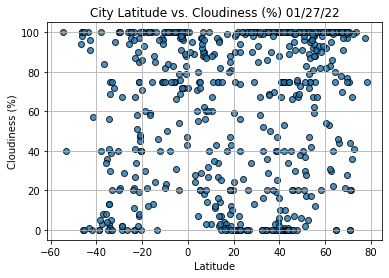

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

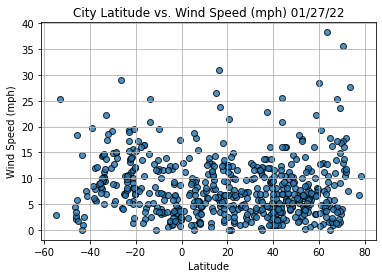

In [30]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed (mph) "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()